# Boston Housing


### Packages

In [2]:
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

In [3]:
#Get the Basics
import math as m
import numpy as np
import pandas as pd

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style

#Scaling nicely
from sklearn.preprocessing import StandardScaler

#Models to be used
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

#Select relevant features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

#Select best model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

%matplotlib inline

/usr/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


## Exploration

Get data and split it : 80% Train, 20% Test

In [4]:
boston_housing = pd.read_csv('train.csv')
threshold = m.floor(80*len(boston_housing.index)/100);
boston_housing_train = boston_housing.iloc[:threshold];
boston_housing_test = boston_housing.iloc[threshold:];

In [5]:
boston_housing_train.info()
boston_housing_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 15 columns):
ID         266 non-null int64
crim       266 non-null float64
zn         266 non-null float64
indus      266 non-null float64
chas       266 non-null int64
nox        266 non-null float64
rm         266 non-null float64
age        266 non-null float64
dis        266 non-null float64
rad        266 non-null int64
tax        266 non-null int64
ptratio    266 non-null float64
black      266 non-null float64
lstat      266 non-null float64
medv       266 non-null float64
dtypes: float64(11), int64(4)
memory usage: 31.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 266 to 332
Data columns (total 15 columns):
ID         67 non-null int64
crim       67 non-null float64
zn         67 non-null float64
indus      67 non-null float64
chas       67 non-null int64
nox        67 non-null float64
rm         67 non-null float64
age        67 non-null float64
dis        67 non-nul

* * *
### Data description
#### crim
per capita crime rate by town.

#### zn
proportion of residential land zoned for lots over 25,000 sq.ft.

#### indus
proportion of non-retail business acres per town.

#### chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

#### nox
nitrogen oxides concentration (parts per 10 million).

#### rm
average number of rooms per dwelling.

#### age
proportion of owner-occupied units built prior to 1940.

#### dis
weighted mean of distances to five Boston employment centres.

#### rad
index of accessibility to radial highways.

#### tax
full-value property-tax rate per $10,000.

#### ptratio
pupil-teacher ratio by town.

#### black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

#### lstat
lower status of the population (percent).

#### medv
median value of owner-occupied homes in $1000s.
* * *
* Quantitative dataset
* No missing features
* Two types: int64 and float64

* * *
Use same numerical type

In [25]:
boston_housing_train = boston_housing_train[boston_housing_train.columns.difference(['ID'])];
boston_housing_train = boston_housing_train.astype('float64');

boston_housing_test = boston_housing_test[boston_housing_test.columns.difference(['ID'])]
boston_housing_test = boston_housing_test.astype('float64');

* * *
Separate features and response

In [26]:
boston_housing_features = boston_housing_train[boston_housing_train.columns.difference(['medv'])];
boston_housing_response = pd.DataFrame(boston_housing_train['medv'],columns=['medv']);

boston_housing_test_features = boston_housing_test[boston_housing_test.columns.difference(['medv'])];
boston_housing_test_response = pd.DataFrame(boston_housing_test['medv'],columns=['medv']);

In [27]:
boston_housing_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,266.0,64.056767,29.129006,6.00000,38.175000,69.15000,91.775000,100.0000
black,266.0,379.253271,42.105919,70.80000,380.452500,392.68500,396.397500,396.9000
chas,266.0,0.075188,0.264191,0.00000,0.000000,0.00000,0.000000,1.0000
crim,266.0,1.782636,4.699444,0.00632,0.066232,0.16940,0.819622,38.3518
dis,266.0,4.046395,2.068307,1.12960,2.274100,3.70955,5.442150,10.7103
indus,266.0,9.621729,6.681481,0.74000,4.050000,7.01500,18.100000,25.6500
lstat,266.0,11.272180,6.832012,1.73000,6.377500,9.57000,14.240000,37.9700
nox,266.0,0.534165,0.113085,0.38500,0.443425,0.50850,0.605000,0.8710
ptratio,266.0,18.007519,2.193563,12.60000,16.600000,18.40000,20.200000,21.2000
rad,266.0,6.864662,6.533261,1.00000,4.000000,5.00000,6.000000,24.0000


In [28]:
boston_housing_response.describe().T

,count,mean,std,min,25%,50%,75%,max
medv,266.0,24.509023,9.223767,5.0,19.3,22.8,27.975,50.0


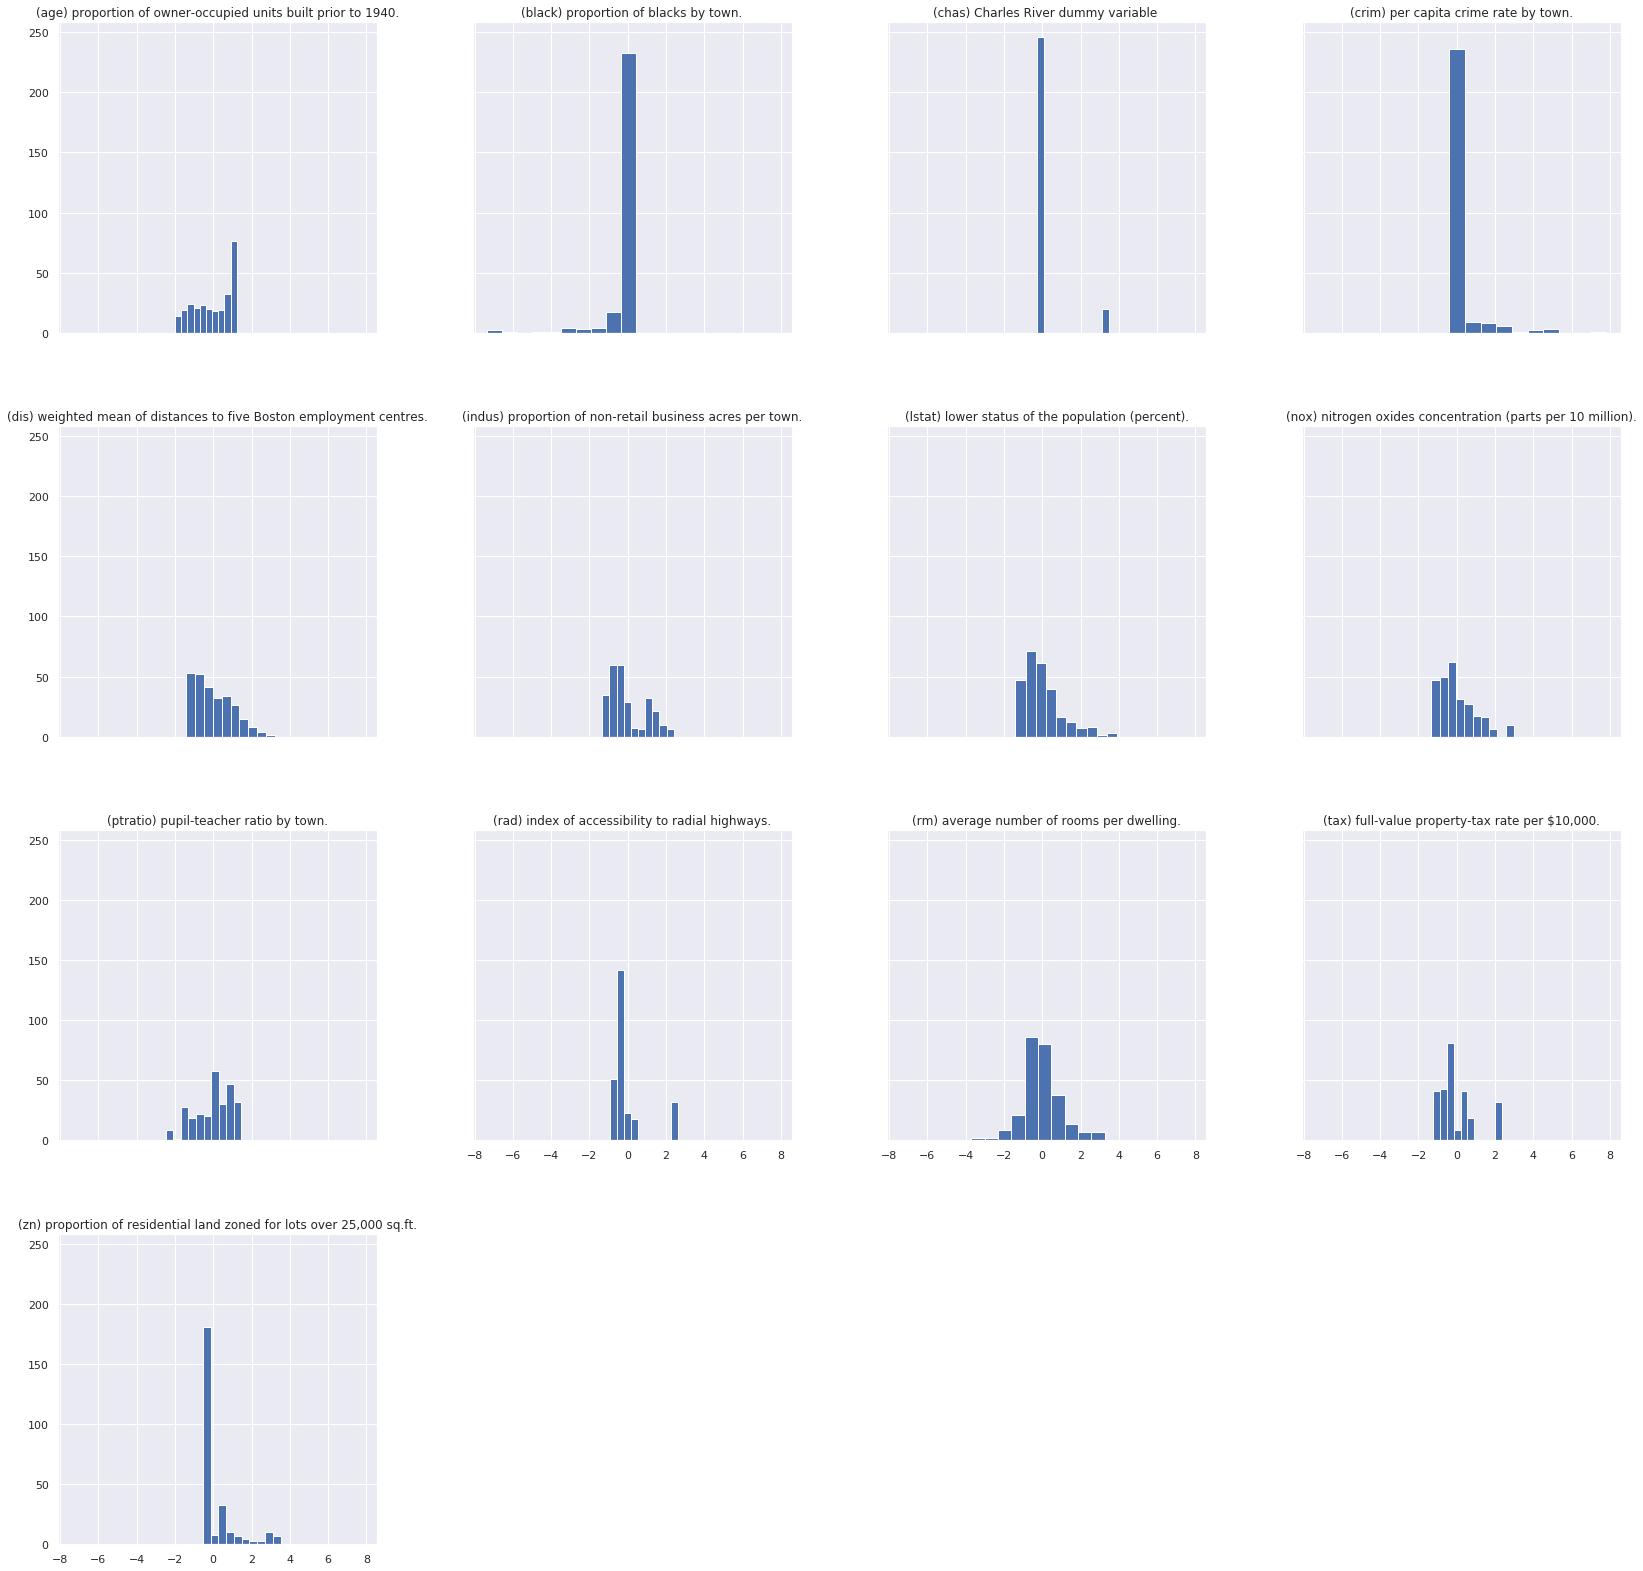

In [29]:
scaler = StandardScaler();
boston_housing_features_names=list(boston_housing_features.columns.values);
boston_housing_features_desc=[
    '(age) proportion of owner-occupied units built prior to 1940.',
    '(black) proportion of blacks by town.',
    '(chas) Charles River dummy variable ',
    '(crim) per capita crime rate by town.',
    '(dis) weighted mean of distances to five Boston employment centres.',
    '(indus) proportion of non-retail business acres per town.',
    '(lstat) lower status of the population (percent).',
    '(nox) nitrogen oxides concentration (parts per 10 million).',
    '(ptratio) pupil-teacher ratio by town.',
    '(rad) index of accessibility to radial highways.',
    '(rm) average number of rooms per dwelling.',
    '(tax) full-value property-tax rate per \$10,000.',
    '(zn) proportion of residential land zoned for lots over 25,000 sq.ft.'
]


boston_housing_features_scaled = pd.DataFrame(scaler.fit_transform(boston_housing_features), 
                                                   columns=boston_housing_features_names);
axes = boston_housing_features_scaled.hist(figsize=(28, 28), sharex=True,sharey=True);
from sklearn import preprocessing
test = preprocessing.scale(boston_housing_features)

i=0
for axe_line in axes:
    for axe in axe_line:
        if i < len(boston_housing_features_desc):
            axe.set_title(boston_housing_features_desc[i],fontsize=12)
            i+=1
        

### First observations
- We could already discard (black), (chas), (zn) as most of their repartition is focused on the mean 
- The majority of owner occupied units are built prior to 1940
- The Boston employment centres are far from the city (repartition skwewed positively)

### Features/response absolute correlation

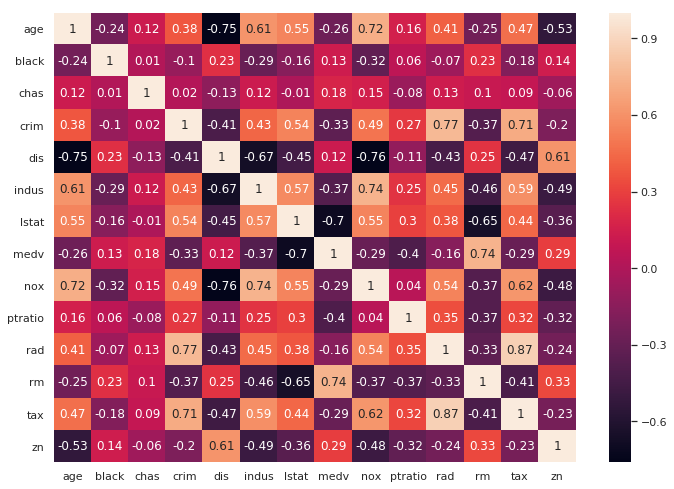

In [30]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(boston_housing_train.corr().round(2), annot=True);

### Features/response ANOVA

In [31]:
anova = f_regression(boston_housing_features,boston_housing_response)
print("ANOVA")
andf = pd.DataFrame(columns=boston_housing_features_desc)
andf.loc[0] = anova[0] #F value
andf.loc[1] = anova[1] #P value
andf.head()

ANOVA


,(age) proportion of owner-occupied units built prior to 1940.,(black) proportion of blacks by town.,(chas) Charles River dummy variable,(crim) per capita crime rate by town.,(dis) weighted mean of distances to five Boston employment centres.,(indus) proportion of non-retail business acres per town.,(lstat) lower status of the population (percent).,(nox) nitrogen oxides concentration (parts per 10 million).,(ptratio) pupil-teacher ratio by town.,(rad) index of accessibility to radial highways.,(rm) average number of rooms per dwelling.,"(tax) full-value property-tax rate per \$10,000.","(zn) proportion of residential land zoned for lots over 25,000 sq.ft."
0,19.567545,4.362686,8.387865,3.134573e+01,4.035518,4.141166e+01,2.539822e+02,25.072340,5.025332e+01,7.206739,3.143846e+02,24.186437,24.672293
1,0.000014,0.037692,0.004094,5.408295e-08,0.045570,5.775283e-10,1.606811e-40,0.000001,1.234147e-11,0.007723,7.258688e-47,0.000002,0.000001


**The median value of owner-occupied homes (medv) seems to be strongly correlated to:** <br> 
* lower status of the population. (lstat) [*anticorrelated*] <br>
* average number of rooms per dwelling. (rm)  <br>
* pupil-teacher ratio by town. (ptratio) [*anticorrelated*]  <br>
* proportion of non-retail business acres per town.(indus) [*anticorrelated*]  <br>
* per capita crime rate by town. (crim) [*anticorrelated*] <br>

* * *
## Regressions

### Helper functions

In [32]:
def Plot(y_true,y_pred):
    fig = plt.figure(figsize=(10,6))
    plt.plot(y_true,label="truth");
    plt.plot(y_pred,label="predicted");
    plt.ylabel('median value of owner-occupied homes in $1000s.',fontsize=10);
    plt.xlabel('sample id',fontsize=10);
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);
    plt.show();

### Linear

Test Rmse:  8.447292736558504


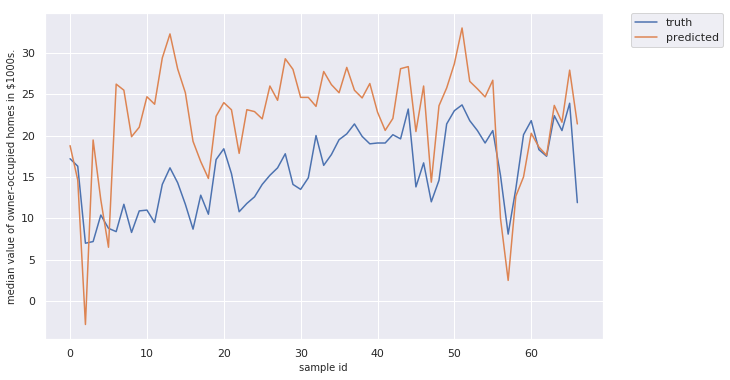

In [33]:
LinearReg = LinearRegression().fit(boston_housing_features,boston_housing_response)
y_pred = LinearReg.predict(boston_housing_test_features);
y_true = boston_housing_test_response.values;

#Visualize
print("Test Rmse: ",np.sqrt(mean_squared_error(y_true,y_pred)));
Plot(y_true,y_pred)

A basic linear regression provides a baseline model we have to improve on, we evaluate then Lasso and Ridge regression

* * *
## Lasso

In [34]:
boston_housing_features.describe().T

,count,mean,std,min,25%,50%,75%,max
age,266.0,64.056767,29.129006,6.00000,38.175000,69.15000,91.775000,100.0000
black,266.0,379.253271,42.105919,70.80000,380.452500,392.68500,396.397500,396.9000
chas,266.0,0.075188,0.264191,0.00000,0.000000,0.00000,0.000000,1.0000
crim,266.0,1.782636,4.699444,0.00632,0.066232,0.16940,0.819622,38.3518
dis,266.0,4.046395,2.068307,1.12960,2.274100,3.70955,5.442150,10.7103
indus,266.0,9.621729,6.681481,0.74000,4.050000,7.01500,18.100000,25.6500
lstat,266.0,11.272180,6.832012,1.73000,6.377500,9.57000,14.240000,37.9700
nox,266.0,0.534165,0.113085,0.38500,0.443425,0.50850,0.605000,0.8710
ptratio,266.0,18.007519,2.193563,12.60000,16.600000,18.40000,20.200000,21.2000
rad,266.0,6.864662,6.533261,1.00000,4.000000,5.00000,6.000000,24.0000


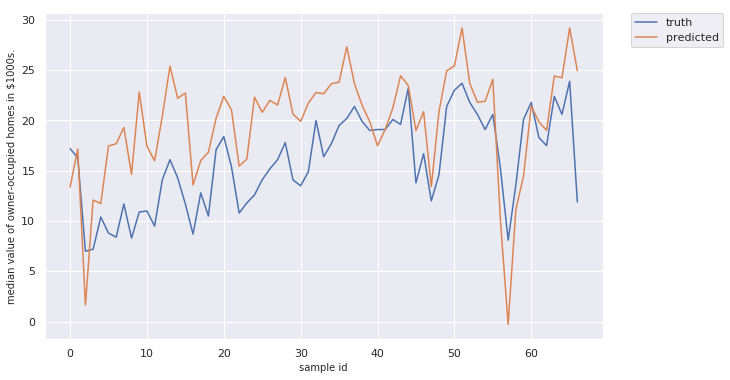


Test Rmse: 5.63806508340324

Weights associated to features


,(age) proportion of owner-occupied units built prior to 1940.,(black) proportion of blacks by town.,(chas) Charles River dummy variable,(crim) per capita crime rate by town.,(dis) weighted mean of distances to five Boston employment centres.,(indus) proportion of non-retail business acres per town.,(lstat) lower status of the population (percent).,(nox) nitrogen oxides concentration (parts per 10 million).,(ptratio) pupil-teacher ratio by town.,(rad) index of accessibility to radial highways.,(rm) average number of rooms per dwelling.,"(tax) full-value property-tax rate per \$10,000.","(zn) proportion of residential land zoned for lots over 25,000 sq.ft."
0,0.020976,0.00152,0.0,-0.00988,-0.755793,0.0,-0.817665,-0.0,-0.512613,0.446251,2.048022,-0.018387,0.047158


In [35]:
LassoReg = LassoCV(alphas=[1e-3,1e-2,1e-2,1,1.001,1.01,1.1]).fit(boston_housing_features,boston_housing_response)
y_pred = LassoReg.predict(boston_housing_test_features);
y_true = boston_housing_test_response.values;

#Visualize
Plot(y_true,y_pred);

#Performance
print("\nTest Rmse: {}\n".format(np.sqrt(mean_squared_error(y_true,y_pred))));

#Get Coefficients
print("Weights associated to features")
coefficients = pd.DataFrame(columns=boston_housing_features_desc)
coefficients.loc[0] = LassoReg.coef_
coefficients.head()

#### The following features are the most relevant following Lasso evaluation
- [rm] average number of rooms per dwelling.
- [dis] weighted mean of distances to five Boston employment centres.
- [lstat] lower status of the population (percent).
- [ptratio] pupil-teacher ratio by town.
- [rad] index of accessibility to radial highways.

* * *
### Ridge

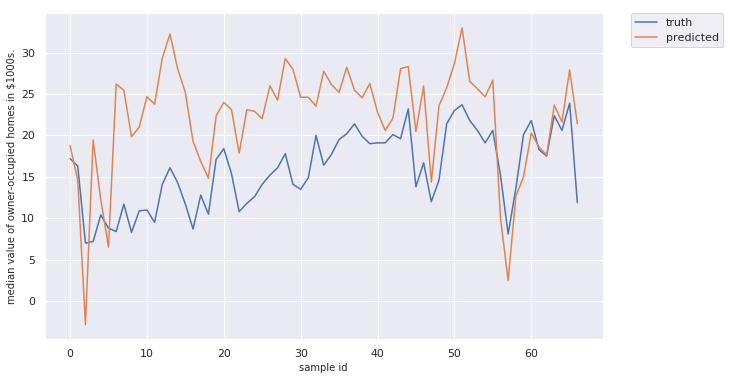


Test Rmse: 8.441369297263805

Weights associated to features


,(age) proportion of owner-occupied units built prior to 1940.,(black) proportion of blacks by town.,(chas) Charles River dummy variable,(crim) per capita crime rate by town.,(dis) weighted mean of distances to five Boston employment centres.,(indus) proportion of non-retail business acres per town.,(lstat) lower status of the population (percent).,(nox) nitrogen oxides concentration (parts per 10 million).,(ptratio) pupil-teacher ratio by town.,(rad) index of accessibility to radial highways.,(rm) average number of rooms per dwelling.,"(tax) full-value property-tax rate per \$10,000.","(zn) proportion of residential land zoned for lots over 25,000 sq.ft."
0,-0.014335,-0.008733,2.310886,-0.27173,-1.457604,0.086408,-0.533725,-14.622449,-0.702749,0.657138,5.238859,-0.016483,0.043857


In [36]:
RidgeReg = RidgeCV(alphas=[1e-3,1e-2,1e-2,1,1.001,1.01,1.1]).fit(boston_housing_features,boston_housing_response)
y_pred = RidgeReg.predict(boston_housing_test_features);
y_true = boston_housing_test_response.values;

#Visualize
Plot(y_true,y_pred)

#Performance
print("\nTest Rmse: {}\n".format(np.sqrt(mean_squared_error(y_true,y_pred))));

#Get Coefficients
print("Weights associated to features")
coefficients = pd.DataFrame(columns=boston_housing_features_desc)
coefficients.loc[0] = RidgeReg.coef_[0]
coefficients.head()

The Lasso model performs better by actually removing useless features

* * *
## Effects of Features Selection

Based on Lasso coefficients and Correlation matrix we select:
    

In [37]:
boston_housing_features_selected = boston_housing_train[['rm','dis','crim','lstat','ptratio','indus']];
boston_housing_features_selected_test = boston_housing_test[['rm','dis','crim','lstat','ptratio','indus']];
boston_housing_features_selected_test.describe()

,rm,dis,crim,lstat,ptratio,indus
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,6.094060,2.374130,9.624068,17.451343,20.197015,17.930597
std,0.479728,0.546924,11.549159,5.736438,0.291272,3.335429
min,4.519000,1.454700,0.045270,5.640000,19.200000,9.690000
25%,5.836000,1.943400,3.906695,14.045000,20.200000,18.100000
50%,6.185000,2.287500,6.801170,16.940000,20.200000,18.100000
75%,6.415500,2.756800,10.452400,20.350000,20.200000,18.100000
max,7.393000,4.098300,73.534100,36.980000,21.000000,27.740000


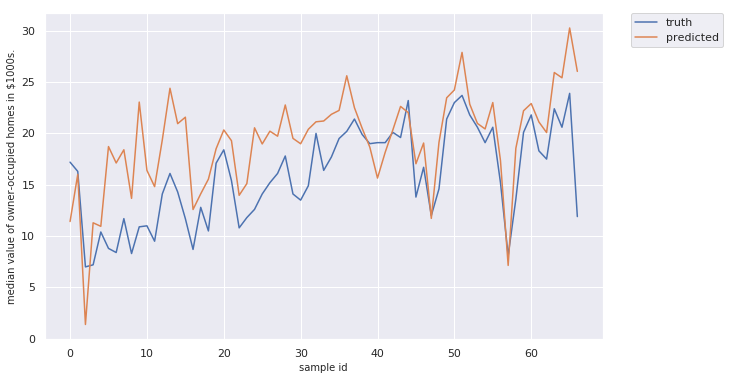


Test Rmse: 4.881506857277766



ValueError: Expected 2D array, got 1D array instead:
array=[11.41818123 16.00741222  1.39135675 11.29433016 10.95022057 18.71853992
 17.12157745 18.40699118 13.67290121 23.05107903 16.40000096 14.81669212
 19.36308573 24.39672442 20.94806114 21.57790528 12.58863875 14.11491597
 15.5472265  18.50359872 20.33713625 19.28980576 13.97125003 15.11167712
 20.54597398 18.97168881 20.21563408 19.72864999 22.76913142 19.51736352
 18.99106063 20.40172123 21.13013852 21.20901178 21.85777558 22.23998112
 25.61258572 22.50233752 20.5052541  18.6640712  15.64925799 18.15874651
 20.34959481 22.628368   22.02618682 17.04402227 19.06281171 11.722581
 19.13694345 23.46802808 24.22922466 27.89009993 22.85091945 20.97193548
 20.43355599 23.00552656 17.35126838  7.14390923 18.55170534 22.20492853
 22.90818527 21.11413165 20.08411213 25.9320089  25.41734855 30.26906925
 26.03858437].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [38]:
LassoRegSelect = LassoCV(alphas=[1e-3,1e-2,1e-2,1,1.001,1.01,1.1]).fit(boston_housing_features_selected,boston_housing_response)
y_pred = LassoRegSelect.predict(boston_housing_features_selected_test);
y_true = boston_housing_test_response.values;

#Visualize
Plot(y_true,y_pred);

#Performance
print("\nTest Rmse: {}\n".format(np.sqrt(mean_squared_error(y_true,y_pred))));
print("score {}".format(LassoRegSelect.score(y_pred,y_true)))

By feature selection we were able toimprove model performance significantly by reducing by ~13% the RMSE

## Submission

In [20]:
boston_housing_testing = pd.read_csv('test.csv')
boston_housing_testing.describe()

boston_housing_features_selected_test = boston_housing_testing[['rm','dis','crim','lstat','ptratio','indus']];
boston_housing_features_selected_test = boston_housing_features_selected_test.astype('float64');
y_pred = LassoRegSelect.predict(boston_housing_features_selected_test);

#Visualize

submission = boston_housing_testing[['ID']]
submission['medv'] = y_pred
with open('submission.csv', 'a+') as f:        
    submission.to_csv(f, header=True,index=False,sep=',') 

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
